## 제2절 다항회귀
- 데이터가 비선형 형태를 가지고 있을 때 -> 각 변수의 거듭제곱을 변수로 추가
- 다항변수 생성 뒤 LinearRegression 함수에 적용

### 1. scikit-learn의 PolynomialFeatures

- 설탕 함유량(X)에 따른 영양등급평가(y)를 회귀분석으로 예측

In [2]:
import pandas as pd
cereal = pd.read_csv('/kaggle/input/adp-book-data/cereal.csv')
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [3]:
cereal = cereal[cereal.columns[3:]]
cereal =cereal[cereal.sugars >=0]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

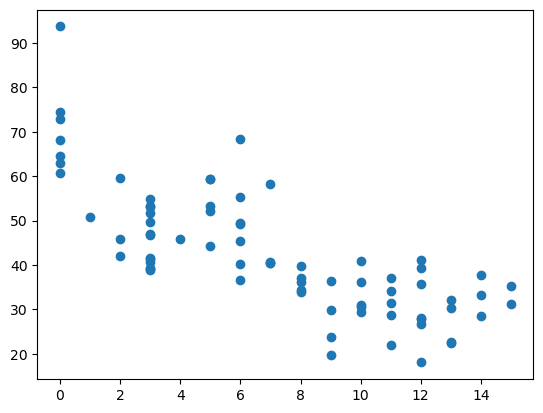

In [4]:
import matplotlib.pyplot as plt
cereal2 = cereal[['sugars', 'rating']]
cereal2.sort_values(by=['sugars'], inplace =True)
cereal2.reset_index(drop=True, inplace =True)
x=cereal2['sugars'].values
y=cereal2['rating'].values
plt.scatter(x,y)
plt.show

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state =1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2) # 주어진 차수 및 교차항까지 추가함
X_poly=poly_reg.fit_transform(X_train.reshape(-1,1))

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [16]:
import numpy as np
X_test_poly=poly_reg.transform(X_test.reshape(-1,1))
pred=reg.predict(X_test_poly)

np.set_printoptions(precision=2) # 소수점 둘째자리까지 표현
print(np.concatenate((pred.reshape(len(pred),1), y_test.reshape(len(y_test),1)),1))

[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test.reshape(-1,1)), y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	33.565
MAE	4.606
RMSE	5.794
ACC	74.376%


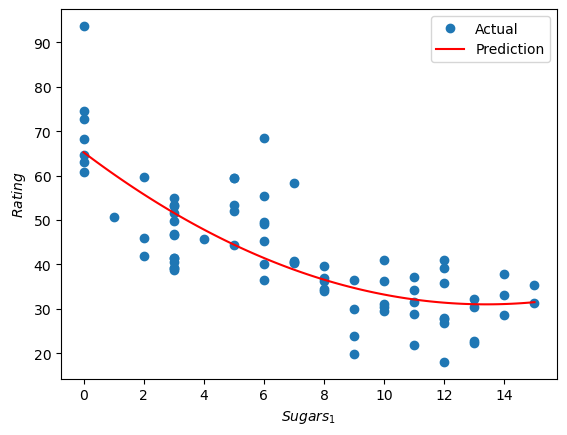

In [12]:
X_new=np.linspace(0,15,100).reshape(100,1)
X_new_poly=poly_reg.transform(X_new)
y_new = reg.predict(X_new_poly)

plt.plot(x,y, 'o', label ='Actual')
plt.plot(X_new, y_new, 'r-', label ='Prediction')
plt.legend(loc='upper right')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Rating$')
plt.show()

#### 코드실습2

- 고차다항 회귀 분석 코드

In [33]:
cereal.head()

,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [18]:
X = cereal.iloc[:,:-1].values
y = cereal.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =1)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53, 12) (23, 12) (53,) (23,)


In [19]:
cereal.iloc[:,:-1].head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75


In [31]:
cereal.iloc[:,-1].head()

0    68.402973
1    33.983679
2    59.425505
3    93.704912
4    34.384843
Name: rating, dtype: float64

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

from sklearn.linear_model import LinearRegression
X_poly = poly_reg.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [23]:
X_train

array([[ 0.76,  0.48,  0.06,  0.63,  1.14, -0.13,  1.01,  2.08, -0.13,
        -0.21,  2.16, -0.44],
       [ 0.22,  0.48,  0.06,  1.15, -0.26, -0.81,  0.57, -0.03, -0.13,
        -1.43, -0.2 , -0.44],
       [-0.31,  0.48, -0.94,  2.06, -0.46,  1.5 , -0.97, -0.66,  3.27,
         1.01, -0.2 ,  0.85],
       [ 0.22, -1.33,  0.06,  1.54, -0.87,  0.14,  0.35, -0.66, -0.13,
        -0.21, -0.2 , -0.44],
       [ 0.22,  3.18, -0.94,  0.89, -0.46,  0.41, -0.97, -0.52, -0.13,
        -1.43, -0.2 ,  0.85],
       [ 0.22, -0.43,  0.06,  0.11, -0.46,  0.69, -0.31, -0.45,  3.27,
         1.01, -0.2 ,  0.85],
       [ 0.22, -0.43, -0.94,  0.76, -0.46,  1.77, -0.97, -0.87, -0.13,
         1.01, -0.2 ,  0.85],
       [-0.85, -0.43, -0.94, -1.9 ,  0.34,  0.14, -0.53, -0.03, -0.13,
        -0.21, -0.2 ,  0.85],
       [-3.01,  1.38, -0.94, -0.28,  4.74, -1.76, -1.63,  3.34, -0.13,
         1.01, -0.2 , -1.74],
       [-0.31,  0.48,  1.06, -0.28,  0.14, -1.08,  0.13,  0.68, -0.13,
         1.01, -0.2 

In [25]:
X_poly

array([[ 1.  ,  0.76,  0.48, ...,  4.69, -0.96,  0.2 ],
       [ 1.  ,  0.22,  0.48, ...,  0.04,  0.09,  0.2 ],
       [ 1.  , -0.31,  0.48, ...,  0.04, -0.17,  0.72],
       ...,
       [ 1.  ,  0.22, -1.33, ...,  0.04, -0.17,  0.72],
       [ 1.  ,  0.76, -1.33, ...,  0.04,  0.09,  0.2 ],
       [ 1.  ,  0.22, -1.33, ...,  0.04, -0.51,  6.55]])

In [26]:
import numpy as np
X_test_poly = poly_reg.transform(X_test)
pred = reg.predict(X_test_poly)

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test), y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	8.711
MAE	2.099
RMSE	2.951
ACC	93.319%


In [37]:
np.linspace(0,15,100)

array([ 0.  ,  0.15,  0.3 ,  0.45,  0.61,  0.76,  0.91,  1.06,  1.21,
        1.36,  1.52,  1.67,  1.82,  1.97,  2.12,  2.27,  2.42,  2.58,
        2.73,  2.88,  3.03,  3.18,  3.33,  3.48,  3.64,  3.79,  3.94,
        4.09,  4.24,  4.39,  4.55,  4.7 ,  4.85,  5.  ,  5.15,  5.3 ,
        5.45,  5.61,  5.76,  5.91,  6.06,  6.21,  6.36,  6.52,  6.67,
        6.82,  6.97,  7.12,  7.27,  7.42,  7.58,  7.73,  7.88,  8.03,
        8.18,  8.33,  8.48,  8.64,  8.79,  8.94,  9.09,  9.24,  9.39,
        9.55,  9.7 ,  9.85, 10.  , 10.15, 10.3 , 10.45, 10.61, 10.76,
       10.91, 11.06, 11.21, 11.36, 11.52, 11.67, 11.82, 11.97, 12.12,
       12.27, 12.42, 12.58, 12.73, 12.88, 13.03, 13.18, 13.33, 13.48,
       13.64, 13.79, 13.94, 14.09, 14.24, 14.39, 14.55, 14.7 , 14.85,
       15.  ])